# Домашнее задание 5. Градиентный спуск. (10 баллов + 2.5 бонус)

В этом домашнем задании вы напишете градиентный спуск для линейной регрессии, а так же посмотрите, как он ведёт себя с разными параметрами и разными функциями потерь.

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

In [1]:
from typing import Iterable, List

import matplotlib.pyplot as plt
import numpy as np

## Часть 1. Градиентный спуск (5 баллов)

Для начала давайте вспомним самый простой функционал ошибки, который мы применяем в задаче регрессии — Mean Squared Error:

$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2
$$

где $x_i$ — это $i$-ый объект датасета, $y_i$ — правильный ответ для $i$-го объекта, а $w$ — веса нашей линейной модели.

Как мы помним, для линейной модели, его можно записать в матричном виде вот так:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2
$$

где $X$ — это матрица объекты-признаки, а $y$ — вектор правильных ответов

Для того чтобы воспользоваться методом градиентного спуска, нам нужно посчитать градиент нашего функционала. Для MSE он будет выглядеть так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y)
$$

Ниже приведён базовый класс `BaseLoss`, который мы будем использовать для реализации всех наших лоссов. Менять его не нужно. У него есть два абстрактных метода:
1. Метод `calc_loss`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения лосса
2. Метод `calc_grad`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения градиента (вектор)

In [2]:
import abc


class BaseLoss(abc.ABC):
    """Базовый класс лосса"""

    @abc.abstractmethod
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        raise NotImplementedError

    @abc.abstractmethod
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        raise NotImplementedError

Теперь давайте напишем реализацию этого абстрактоного класса: Mean Squared Error лосс.

**Задание 1.1 (5/8 балла):** Реализуйте класс `MSELoss`

Он должен вычислять лосс и градиент по формулам наверху

In [3]:
class MSELoss(BaseLoss):
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        # -- YOUR CODE HERE --
        # Вычислите значение функции потерь при помощи X, y и w и верните его
        return np.square(np.linalg.norm(np.dot(X, w) - y)) / X.shape[0]
    
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        # -- YOUR CODE HERE --
        # Вычислите значение вектора градиента при помощи X, y и w и верните его
        return np.dot(X.transpose(), (np.dot(X, w) - y)) * 2 / X.shape[0]

Теперь мы можем создать объект `MSELoss` и при помощи него вычислять значение нашей функции потерь и градиенты:

In [4]:
# Создадим объект лосса
loss = MSELoss()

# Создадим какой-то датасет
X = np.arange(200).reshape(20, 10)
y = np.arange(20)

# Создадим какой-то вектор весов
w = np.arange(10)

# Выведем значение лосса и градиента на этом датасете с этим вектором весов
print(loss.calc_loss(X, y, w))
print(loss.calc_grad(X, y, w))

# Проверка, что методы реализованы правильно
assert loss.calc_loss(X, y, w) == 27410283.5, "Метод calc_loss реализован неверно"
assert np.allclose(
    loss.calc_grad(X, y, w),
    np.array(
        [
            1163180.0,
            1172281.0,
            1181382.0,
            1190483.0,
            1199584.0,
            1208685.0,
            1217786.0,
            1226887.0,
            1235988.0,
            1245089.0,
        ]
    ),
), "Метод calc_grad реализован неверно"
print("Всё верно!")

27410283.5
[1163180. 1172281. 1181382. 1190483. 1199584. 1208685. 1217786. 1226887.
 1235988. 1245089.]
Всё верно!


Теперь когда у нас есть всё для вычисления градиента, давайте напишем наш градиентный спуск. Напомним, что формула для одной итерации градиентного спуска выглядит следующим образом:

$$
w^t = w^{t-1} - \eta \nabla_{w} Q(w^{t-1}, X, y)
$$

Где $w^t$ — значение вектора весов на $t$-ой итерации, а $\eta$ — параметр learning rate, отвечающий за размер шага.

**Задание 1.2 (5/8 балла):** Реализуйте функцию `gradient_descent`

Функция должна принимать на вход начальное значение весов линейной модели `w_init`, матрицу объектов-признаков `X`, 
вектор правильных ответов `y`, объект функции потерь `loss`, размер шага `lr` и количество итераций `n_iterations`.

Функция должна реализовывать цикл, в котором происходит шаг градиентного спуска (градиенты берутся из `loss` посредством вызова метода `calc_grad`) по формуле выше и возвращать 
траекторию спуска (список из новых значений весов на каждом шаге)

In [5]:
def gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    n_iterations: int = 100000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    # -- YOUR CODE HERE --
    
    traj = np.zeros((n_iterations + 1, w_init.shape[0]))
    traj[0] = w_init
    
    for step in range(n_iterations):
        grad = loss.calc_grad(X, y, traj[step])
        if np.linalg.norm(grad) < 1e-8:
            break
        w = traj[step] - lr * grad
        traj[step + 1] = w
    
    return traj

Теперь создадим синтетический датасет и функцию, которая будет рисовать траекторию градиентного спуска по истории:

In [6]:
# Создаём датасет из двух переменных и реального вектора зависимости w_true

np.random.seed(1337)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features,))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

print(X.shape)
print(y.shape)

(300, 2)
(300,)


In [7]:
loss = MSELoss()
w_list = gradient_descent(w_init, X, y, loss, 0.01, 100)
print(loss.calc_loss(X, y, w_list[0]))
print(loss.calc_loss(X, y, w_list[-1]))

425.5891768045026
0.8670644395649494


In [8]:
def plot_gd(w_list: Iterable, X: np.ndarray, y: np.ndarray, loss: BaseLoss):
    """
    Функция для отрисовки траектории градиентного спуска
    :param w_list: Список из объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать лосс при помощи loss.calc_loss(X, y, w)
    """
    w_list = np.array(w_list)
    meshgrid_space = np.linspace(-2, 2, 100)
    A, B = np.meshgrid(meshgrid_space, meshgrid_space)

    levels = np.empty_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = loss.calc_loss(X, y, w_tmp)

    plt.figure(figsize=(15, 6))
    plt.title("GD trajectory")
    plt.xlabel(r"$w_1$")
    plt.ylabel(r"$w_2$")
    plt.xlim(w_list[:, 0].min() - 0.1, w_list[:, 0].max() + 0.1)
    plt.ylim(w_list[:, 1].min() - 0.1, w_list[:, 1].max() + 0.1)
    plt.gca().set_aspect("equal")

    # visualize the level set
    CS = plt.contour(
        A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r
    )
    CB = plt.colorbar(CS, shrink=0.8, extend="both")

    # visualize trajectory
    plt.scatter(w_list[:, 0], w_list[:, 1])
    plt.plot(w_list[:, 0], w_list[:, 1])

    plt.show()

**Задание 1.3 (5/8 балла):** При помощи функций `gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`). Используйте не менее четырёх разных значений для `lr`. 

Сделайте и опишите свои выводы о том, как параметр `lr` влияет на поведение градиентного спуска

Подсказки:
* Функция `gradient_descent` возвращает историю весов, которую нужно подать в функцию `plot_gd`
* Хорошие значения для `lr` могут лежать в промежутке от 0.0001 до 0.1

0.0001


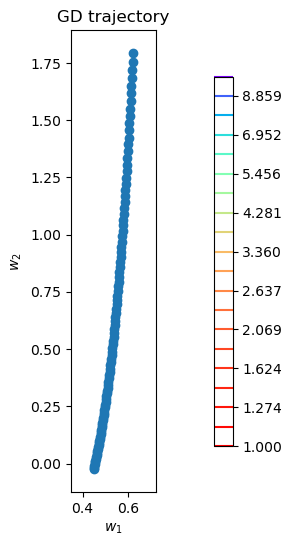

0.001


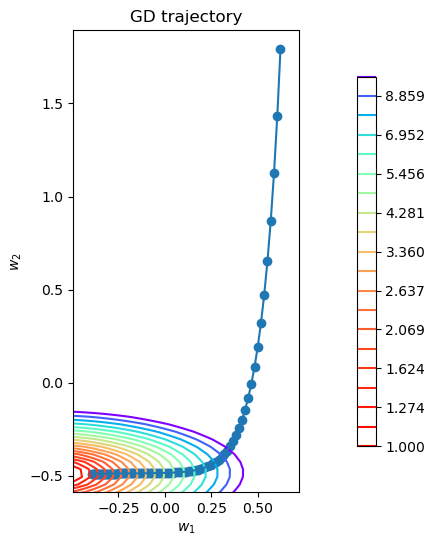

0.01


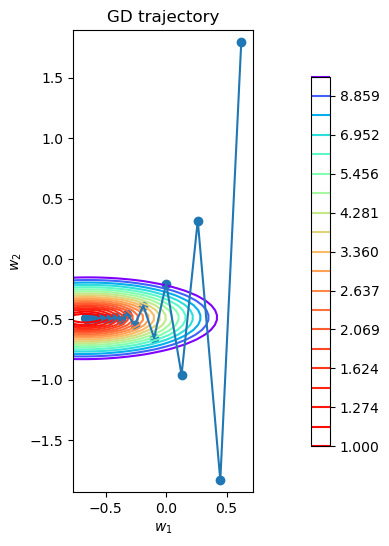

0.05


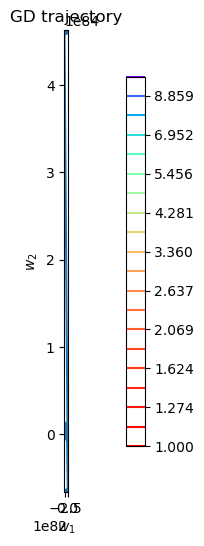

0.1


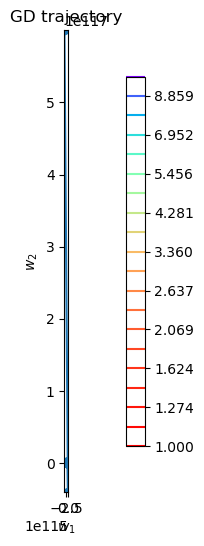

In [9]:
for ss in [0.0001, 0.001, 0.01, 0.05, 0.1]:
    print(ss)    
    trace = gradient_descent(w_init, X, y, loss, ss, 100)
    plot_gd(trace, X, y, loss)

При очень маленьком длине шага (0.0001) градиентный спуск совсем не доходит даже до верхнего уровня ошибки - что и понятно: шаг дейтсивтельно слишком маленький, и потребуется большее количество итераций, чтобы градиентный спуск выдал нам более-менее норммальный результат. 

С увеличением шага, как мы видим, ситуация становится лучше: при шаге 0.001 градиент достаточно ровно и бесперебейно спускается к минимуму (впрочем, можем увидеть, что до самого центра глобального минимума он все же не спустился). При длине шага 0.01 градиент больше "петляет", однако спускается в глобальный минимум при нашем кол-ве итераций, что по итогу делает его более оптимальным для поиска минимальной ошибки. В нашем случае существует один глобальный минимум, из-за чего мы можем позволить себе выбрать длину шага чуть побольше и не бояться, что градиент его перескочит (а как мы видим, перескакивает он достаточно ловко) - однако в случае с более сложными функциями потерь нужно быть осторожнее.

При дальнейшим увеличении шага графики и вовсе схлопываются: лосс уходит в бесконечность, а веса становятся слишком огромными, чтобы мы их могли хотя бы нарисовать :) Это происходит из-за того, что градиент "промахивается" и не находит минимум.

Теперь реализуем стохастический градиентный спуск

**Задание 1.4 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent`

Функция должна принимать все те же параметры, что и функция `gradient_descent`, но ещё параметр `batch_size`, отвечающий за размер батча. 

Функция должна как и раньше реализовывать цикл, в котором происходит шаг градиентного спуска, но на каждом шаге считать градиент не по всей выборке `X`, а только по случайно выбранной части.

Подсказка: для выбора случайной части можно использовать [`np.random.choice`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) с правильным параметром `size`, чтобы выбрать случайные индексы, а потом проиндексировать получившимся массивом массив `X`:
```
batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
batch = X[batch_indices]
```

In [10]:
def stochastic_gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    n_iterations: int = 1000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    traj = np.zeros((n_iterations + 1, w_init.shape[0]))
    traj[0] = w_init
    
    for step in range(n_iterations):
        batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
        batch_X = X[batch_indices]
        batch_y = y[batch_indices]
        
        grad = loss.calc_grad(batch_X, batch_y, traj[step])
        w = traj[step] - lr * grad
        traj[step + 1] = w
    
    return traj

**Задание 1.5 (5/8 балла):** При помощи функций `stochastic_gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`) и размера подвыборки (параметра `batch_size`). Используйте не менее четырёх разных значений для `lr` и `batch_size`. 

Сделайте и опишите свои выводы о том, как параметры  `lr` и `batch_size` влияют на поведение стохастического градиентного спуска. Как отличается поведение стохастического градиентного спуска от обычного?

Обратите внимание, что в нашем датасете всего 300 объектов, так что `batch_size` больше этого числа не будет иметь смысла.

0.0001


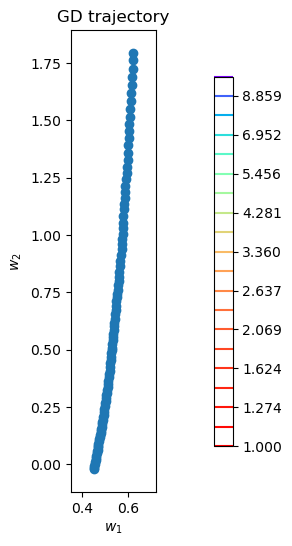

0.001


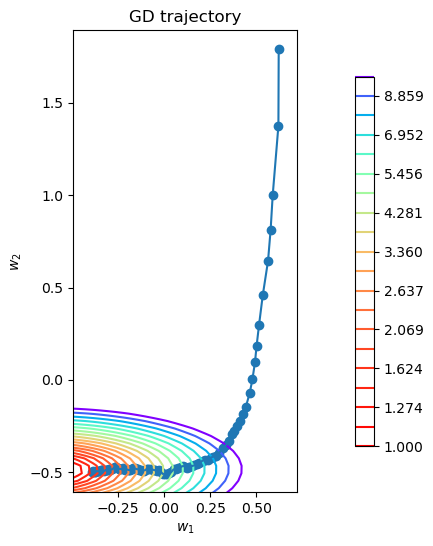

0.01


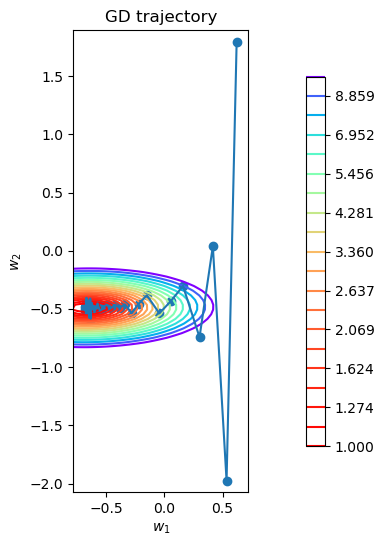

0.1


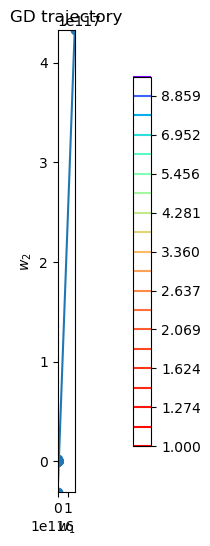

In [11]:
for ss in [0.0001, 0.001, 0.01, 0.1]:
    print(ss)
    trace = stochastic_gradient_descent(w_init, X, y, loss, ss, 50, 100)
    plot_gd(trace, X, y, loss)

Я решила разделить это задание на две части и сначала посмотреть, как ведет себя стохастический градиентный спуск при разной длине шага и при разном батче, вместо того, что их совмещать - так можно сделать хоть какие-нибудь выводы о влиянии каждого из параметров :)

Ситуация с длиной шага осталась точно такая же, как и в случае с обычным градиентным спуском: при слишком маленьких значений градиент не доходит до минимума, при слишком больших - перескакивает

2


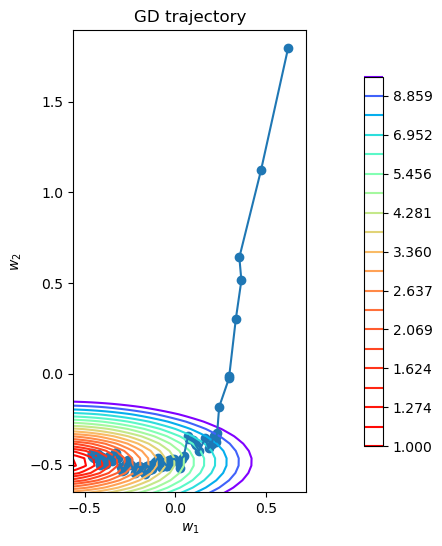

4


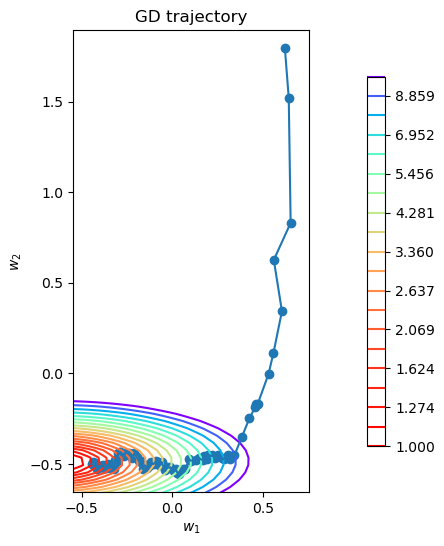

16


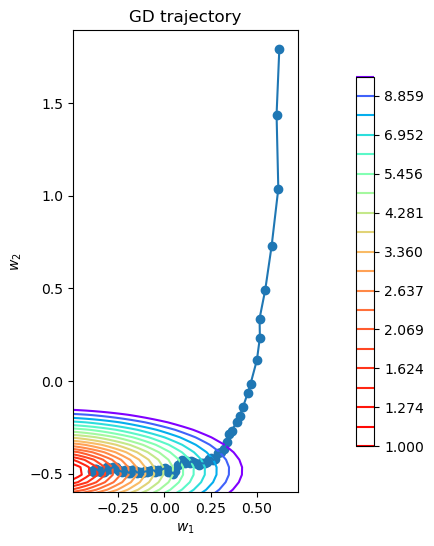

32


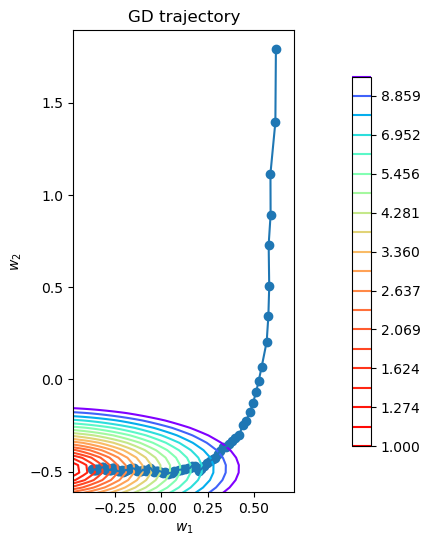

64


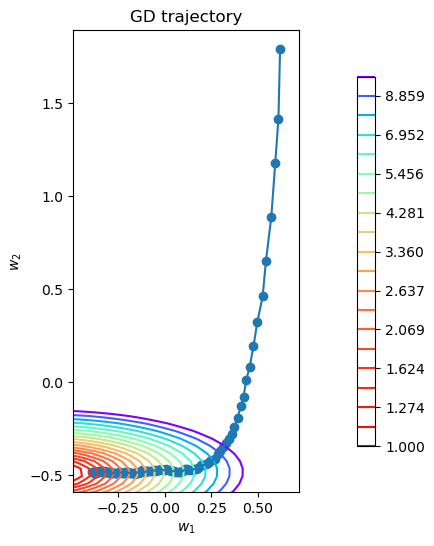

128


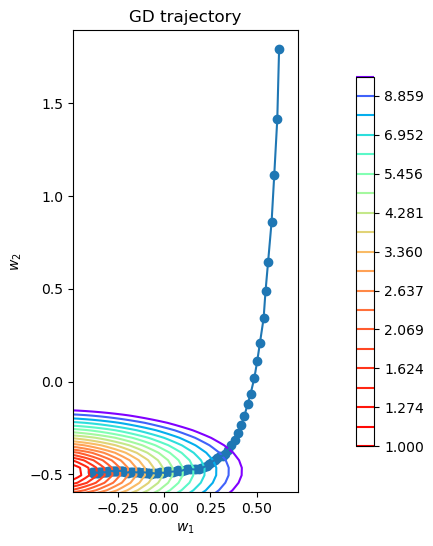

In [12]:
for bs in [2, 4, 16, 32, 64, 128]:
    print(bs)
    trace = stochastic_gradient_descent(w_init, X, y, loss, 0.001, bs, 100)
    plot_gd(trace, X, y, loss)

Картина достаточно очевидная: чем меньше батч, тем больше скачет график (хотя в нашем случае они все достаточно неплохо дошли до мнимума). Действительно, при больших размерах датасета стохастический градиент может сильно помочь и снизить время работы - график будет "пошатываться", но, как мы можем увидеть, графики при батче, равном 32, 64 и 128 отличаются не очень радикально.

Вы могли заметить, что поведение градиентного спуска, особенно стохастической версии, очень сильно зависит от размера шага. 

Как правило, в начале спуска мы хотим делать большие шаги, чтобы поскорее подойти поближе к минимуму, а позже мы уже хотим делать шаги маленькие, чтобы более точнее этого минимума достичь и не "перепрыгнуть" его. 

Чтобы достичь такого поведения мы можем постепенно уменьшать длину шага с увеличением номера итерации. Сделать это можно, например, вычисляя на каждой итерации длину шага по следующей формуле:

$$
    \eta_t
    =
    \lambda
    \left(
        \frac{s_0}{s_0 + t}
    \right)^p
$$

где $\eta_t$ — длина шага на итерации $t$, $\lambda$ — начальная длина шага (параметр `lr` у нас), $s_0$ и $p$ — настраиваемые параметры.

**Задание 1.6 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent` на этот раз с затухающим шагом по формуле выше. Параметр $s_0$ возьмите равным 1. Параметр $p$ возьмите из нового аргумента функции `p`.

In [13]:
def stochastic_gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    p: float,
    n_iterations: int = 1000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param p: float -- значение степени в формуле затухания длины шага
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    traj = np.zeros((n_iterations + 1, w_init.shape[0]))
    traj[0] = w_init
    
    for step in range(n_iterations):
        batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
        batch_X = X[batch_indices]
        batch_y = y[batch_indices]
        
        step_length = lr * (1 / (1 + step))**p
        
        grad = loss.calc_grad(batch_X, batch_y, traj[step])
        w = traj[step] - step_length * grad
        traj[step + 1] = w
    
    return traj

**Задание 1.7 (5/8 балла):** При помощи новой функции `stochastic_gradient_descent` и функции `plot_gd` нарисуйте траекторию градиентного спуска для разных значений параметра `p`. Используйте не менее четырёх разных значений для `p`. Хорошими могут быть значения, лежащие в промежутке от 0.1 до 1.
Параметр `lr` возьмите равным 0.01, а параметр `batch_size` равным 10.

Сделайте и опишите свои выводы о том, как параметр `p` влияет на поведение стохастического градиентного спуска

0.1


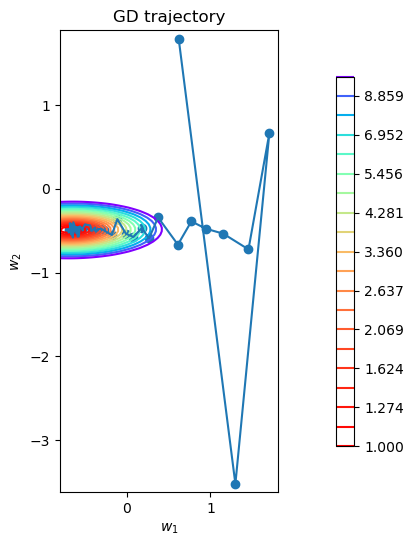

0.3


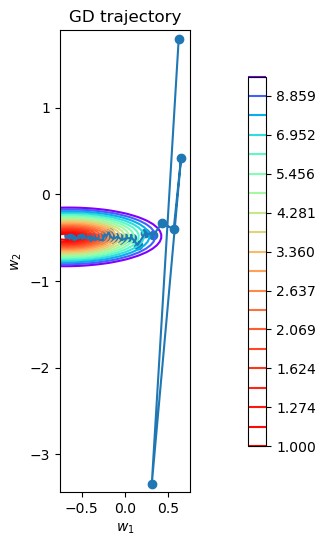

0.5


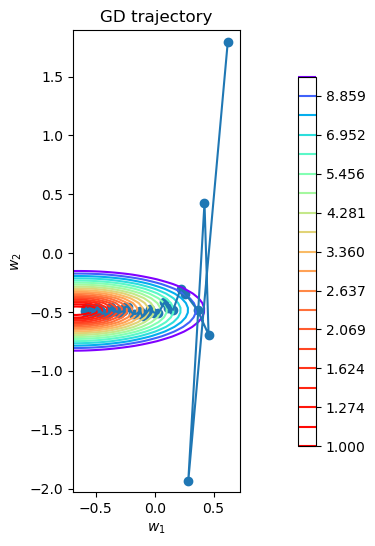

0.8


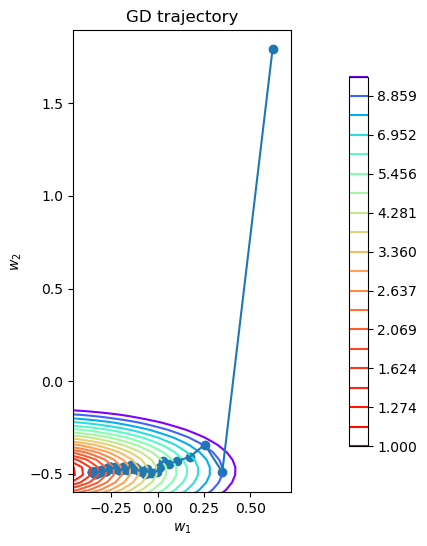

1


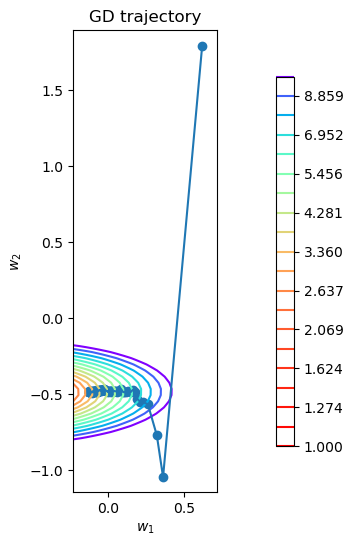

In [14]:
for p in [0.1, 0.3, 0.5, 0.8, 1]:
    print(p)
    trace = stochastic_gradient_descent(w_init, X, y, loss, 0.01, 10, p, 100)
    plot_gd(trace, X, y, loss)

Исходя из формулы, чем меньше p - тем больше длина шага на первых итерациях и тем медленнее длина шага уменьшается. То же самое мы видим и на графиках: при маленьких значениях p спуск сильно петляет, при очень маленьких значениях петляет как в начале пути, так и ближе к минимуму (что очень опасно, тк есть шанс его перепрыгнуть в таком случае). С постепенным увеличением градиент чуть меньше петляет и в начале, и в конце пути, а последние графики и вовсе не такие петляющие и все более похожи на спуск с постоянным шагом.

**Задание 1.8 (5/8 балла):** Сравните сходимость обычного градиентного спуска и стохастичекой версии:
Нарисуйте график зависимости значения лосса (его можно посчитать при помощи метода `calc_loss`, используя $x$ и $y$ из датасета и $w$ с соответствующей итерации) от номера итерации для траекторий, полученных при помощи обычного и стохастического градиентного спуска с одинаковыми параметрами. Параметр `batch_size` возьмите равным 10.

Видно ли на данном графике преимущество SGD? Почему?

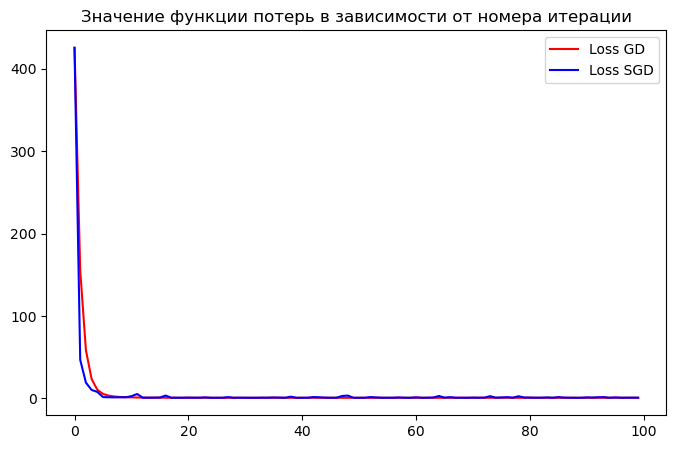

In [15]:
loss_gd = []
loss_sgd = []

w_gd_list = gradient_descent(w_init, X, y, loss, 0.01, 100)
w_sgd_list = stochastic_gradient_descent(w_init, X, y, loss, 0.01, 10, 0, 100)

for step in range(100):
    loss_gd.append(loss.calc_loss(X, y, w_gd_list[step]))
    loss_sgd.append(loss.calc_loss(X, y, w_sgd_list[step]))
    
fig = plt.figure(figsize=(8, 5))
plt.plot(range(100), loss_gd, '-r', label='Loss GD')
plt.plot(range(100), loss_sgd, '-b', label='Loss SGD')
plt.legend()
plt.title("Значение функции потерь в зависимости от номера итерации") 
plt.show()

Как мы можем увидеть, обычный градиентный спуск идеть очень равно: он быстро подобрался к минимуму и так же ровно шел дальше, в то время как стохастический градиентный спуск хоть и немного быстрее подошел к минимуму (возможно это также лишь в нашем случае, а не общее правило), однако затем часто петлял и был достаточно нестабильным. Нестабильность стохастического градиентного спуска объясняется просто из его теории: ошибка по рандомной выборке не всегда отражает полную ошибку, поэтому и возникает нестабильность.

## Часть 2. Линейная регрессия (5 баллов)

Теперь давайте напишем наш класс для линейной регрессии. Он будет использовать интерфейс, знакомый нам из библиотеки `sklearn`.

В методе `fit` мы будем подбирать веса `w` при помощи градиентного спуска нашим методом `gradient_descent`

В методе `predict` мы будем применять нашу регрессию к датасету, 

**Задание 2.1 (5/8 балла):** Допишите код в методах `fit` и `predict` класса `LinearRegression`

В методе `fit` вам нужно как-то инициализировать веса `w`, применить `gradient_descent` и сохранить последнюю `w` из траектории.

В методе `predict` вам нужно применить линейную регрессию и вернуть вектор ответов.

Обратите внимание, что объект лосса передаётся в момент инициализации и хранится в `self.loss`. Его нужно использовать в `fit` для `gradient_descent`.

In [16]:
class LinearRegression:
    def __init__(self, loss: BaseLoss, lr: float = 0.1) -> None:
        self.loss = loss
        self.lr = lr

    def fit(self, X: np.ndarray, y: np.ndarray) -> "LinearRegression":
        X = np.asarray(X)
        y = np.asarray(y)
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        
        w = gradient_descent(np.random.rand(X.shape[1]), X, y, self.loss, self.lr, 10000)
        self.w = w[-1]
        return self

    def predict(self, X: np.ndarray) -> np.ndarray:
        # Проверяем, что регрессия обучена, то есть, что был вызван fit и в нём был установлен атрибут self.w
        assert hasattr(self, "w"), "Linear regression must be fitted first"
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])

        predicted = np.dot(X, self.w)
        return predicted

Теперь у нас есть наш класс линейной регрессии. Более того, мы можем управлять тем, какую функцию потерь мы оптимизируем, просто передавая разные классы в параметр `loss` при инициализации. 

Пока у нас нет никаких классов кроме `MSELoss`, но скоро они появятся.

Для `MSELoss` мы бы создавали наш объект линейной регрессии, например, так:

In [17]:
linear_regression = LinearRegression(MSELoss())

Применим нашу регрессию на реальном датасете. Загрузим датасет с машинами, который был у вас на семинарах:

In [18]:
import pandas as pd

X_raw = pd.read_csv(
    "http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data",
    header=None,
    na_values=["?"],
)
X_raw.head()
X_raw = X_raw[~X_raw[25].isna()].reset_index()

In [19]:
y = X_raw[25]
X_raw = X_raw.drop(25, axis=1)

**Задание 2.2 (5/8 балла):** Как обычно обработайте датасет всеми нужными методами, чтобы на нём можно было обучать линейную регрессию:

* Разделите датасет на обучающую и тестовую выборку
* Заполните пропуски
* Нормализуйте числовые признаки
* Закодируйте категориальные переменные

In [20]:
# посмотрим на данные:

X_raw.head()

,index,0,1,2,3,4,5,6,7,8,...,15,16,17,18,19,20,21,22,23,24
0,0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,...,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27
1,1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,...,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27
2,2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,...,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26
3,3,2,164.0,audi,gas,std,four,sedan,fwd,front,...,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30
4,4,2,164.0,audi,gas,std,four,sedan,4wd,front,...,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22


In [21]:
X_raw.set_index('index', inplace=True)

пропущенные значения в вещественных признаках заполним средними значениями, в категориальных - пустыми строками:

**Задание 2.3 (5/8 балла):** Обучите написанную вами линейную регрессию на обучающей выборке

In [22]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split

# разделелим колонки на колонки с категориальными и вещественными признаками
cat_features = list(X_raw.columns[(X_raw.dtypes == "object").values])
num_features = list(X_raw.columns[(X_raw.dtypes != "object").values])

# делим выборку
X_train, X_test, y_train, y_test = train_test_split(X_raw, y, test_size=0.3, random_state=1403) 

# трансформируем: пропущенные значения в вещественных признаках заполняем средними, в категориальных - пустыми
# строками. вещественные признаки стандартизируем, категориальные кодируем One hot


num_col_transformer = Pipeline([
    ('Imput mean', SimpleImputer(strategy='mean')),
    ('Scale', MinMaxScaler())])


cat_col_transformer = Pipeline([
    ('Imput empty', SimpleImputer(strategy='constant', fill_value='')),
    ('One hot', OneHotEncoder(handle_unknown='ignore'))]) 
    # drop='first' убран из-за handle_unknown, подробно объяснить могу в лс @ppolzaa


col_transformer = ColumnTransformer([
    ('Imput mean', num_col_transformer, num_features),
    ('Imput empty', cat_col_transformer, cat_features)])

X_train = col_transformer.fit_transform(X_train)
X_test = col_transformer.transform(X_test)

In [23]:
linreg = LinearRegression(MSELoss(), 0.01).fit(X_train, y_train)

**Задание 2.4 (5/8 балла):** Посчитайте ошибку обученной регрессии на обучающей и тестовой выборке при помощи метода `mean_squared_error` из `sklearn.metrics`.

In [24]:
from sklearn.metrics import mean_squared_error

print(f'mse train: {mean_squared_error(y_train, linreg.predict(X_train))}')
print(f'mse test:  {mean_squared_error(y_test, linreg.predict(X_test))}')

mse train: 2686002.223496827
mse test:  3640980.914225458


Наша модель переобучилась. Давайте как обычно в такой ситуации добавим к ней L2 регуляризацию. Для этого нам нужно написать новый класс лосса.

Формула функции потерь для MSE с L2 регуляризацией выглядит так:
$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2 + \lambda ||w||^2
$$

Или в матричном виде:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2 + \lambda ||w||^2
$$

Где $\lambda$ — коэффициент регуляризации

Градиент выглядит так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y) + 2 \lambda w
$$

**Задание 2.5 (5/8 балла):** Реализуйте класс `MSEL2Loss`

Он должен вычислять лосс и градиент по формулам наверху

Подсказка: обратите внимание, что последний элемент вектора `w` — это bias (в классе `LinearRegression` к матрице `X` добавляется колонка из единиц — константный признак). Как мы знаем из лекций и семинаров, bias регуляризовать не нужно. Поэтому не забудьте убрать последний элемент из `w` при подсчёте слагаемого $\lambda||w||^2$ в `calc_loss` и занулить его при подсчёте слагаемого $2 \lambda w$ в `calc_grad`

In [25]:
class MSEL2Loss(BaseLoss):
    def __init__(self, coef: float = 1.0):
        """
        :param coef: коэффициент регуляризации (лямбда в формуле)
        """
        self.coef = coef

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета. Последний признак константный.
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии. Последний вес -- bias.
        :output: число -- значения функции потерь
        """
        # -- YOUR CODE HERE --
        # Вычислите значение функции потерь при помощи X, y и w и верните его
        
        error = np.square(np.linalg.norm(np.dot(X, w) - y)) / X.shape[0]
        reg = self.coef * np.square(np.linalg.norm(w[:-1]))
        return error + reg

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        # -- YOUR CODE HERE --
        # Вычислите значение вектора градиента при помощи X, y и w и верните его
        
        w_copy = w.copy()
        w_copy[-1] = 0
        grad = 2 * np.dot(X.transpose(), np.dot(X, w) - y) / X.shape[0]
        reg = 2 * self.coef * w_copy
        return grad + reg

Теперь мы можем использовать лосс с l2 регуляризацией в нашей регрессии, например, так:

In [26]:
linear_regression = LinearRegression(MSEL2Loss(0.1), 0.01)

**Задание 2.6 (5/8 балла):** Обучите регрессию с лоссом `MSEL2Loss`. Подберите хороший коэффициент регуляризации и добейтесь улучшения результата на тестовой выборке. Сравните результат на обучающей и тестовой выборке с регрессией без регуляризации. 

In [27]:
best_err = 1e+40
best_reg = 0
for reg in np.logspace(-4, 1, 10):
    lr_l2 = LinearRegression(MSEL2Loss(reg), 0.01).fit(X_train, y_train)
    err = mean_squared_error(y_test, lr_l2.predict(X_test)) 
    if err < best_err:
        best_err = err
        best_reg = reg
        
lr_l2 = LinearRegression(MSEL2Loss(best_reg), 0.01).fit(X_train, y_train)

print(f'mse lr train:    {mean_squared_error(y_train, linreg.predict(X_train))}')
print(f'mse lr_l2 train: {mean_squared_error(y_train, lr_l2.predict(X_train))}')
print()
print(f'mse lr test:     {mean_squared_error(y_test, linreg.predict(X_test))}')
print(f'mse lr_l2 test:  {mean_squared_error(y_test, lr_l2.predict(X_test))}')

mse lr train:    2686002.223496827
mse lr_l2 train: 3189435.933010596

mse lr test:     3640980.914225458
mse lr_l2 test:  3079442.6494200933


**итого** мы видим, что с помощью регуляризатора ошибка возросла на трейне, однако заметно уменьшилась на ~600000 на тесте. кроме того, можем видеть, что соотношение ошибки на трейне и на тесте в регрессии с регуляризатором свидетельствует о том, что нам удалось побороть проблему с переобучением: ошибка на тесте меньше ошибки на трейне

В нашем датасете могут быть выбросы. На семинаре вам рассказывали, что с выбросами хорошо помогает бороться Huber Loss. Вдали от нуля он работает как Mean Absolute Error и не реагирует на выбросы так сильно, как MSE. Давайте его реализуем и применим в нашей регрессии.

Напомним, что функция потерь Huber Loss'а  выглядит так:


$$
    Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \phi_\varepsilon(z) = \begin{cases} \frac 1 2 z^2, - \varepsilon < z < \varepsilon, \\\varepsilon (|z| - \frac 1 2 \varepsilon), иначе \\ \end{cases}
$$


А градиент так:
$$
    \nabla_w Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell x_i \nabla_z \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \nabla_z \phi_\varepsilon(z) = \begin{cases} z, - \varepsilon < z < \varepsilon, \\\varepsilon \text{ sign}(z), иначе \\ \end{cases}
$$

**Задание 2.7 (5/8 балла):** Реализуйте класс `HuberLoss`

Он должен вычислять лосс и градиент по формулам наверху

In [28]:
class HuberLoss(BaseLoss):
    def __init__(self, eps: float) -> None:
        """
        :param eps: параметр huber loss из формулы
        """
        self.eps = eps

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: число -- значения функции потерь
        """
        # -- YOUR CODE HERE --
        # Вычислите значение функции потерь при помощи X, y и w и верните его
        
        total = 0
        for line in range(X.shape[0]):
            z = np.dot(X[line], w) - y[line]
            if abs(z) < self.eps:
                total += 0.5*(z**2)
            else:
                total += eps(abs(z) - eps*0.5) 
        
        return total / X.shape[0]

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        # -- YOUR CODE HERE --
        # Вычислите значение вектора градиента при помощи X, y и w и верните его
        
        full = 0
        for line in range(X.shape[0]):
            z = np.dot(X[line], w) - y[line]
            if abs(z) < self.eps:
                full += X[line] * z
            else:
                full += X[line] * np.sign(z) * self.eps
        
        return full / X.shape[0]

**Задание 2.8 (5/8 балла):** Обучите регрессию с лоссом `HuberLoss`. Сравните результат на обучающей и тестовой выборке с регрессией, обученной c `MSELoss`.

In [29]:
# вещь снизу работает непозволительно долго, поэтому ее мы закомментим, а оптимальный коэффициент просто сохраним :)

# best_err = 1e+40
# best_coef = 0
# for coef in np.logspace(-1, 6, 10):
#     lr_huber = LinearRegression(HuberLoss(coef), 0.01).fit(X_train, y_train)
#     err = mean_squared_error(y_test, lr_huber.predict(X_test))
#     if err < best_err:
#         best_err = err
#         best_coef = coef

best_coef = 27825.59402207126
lr_huber = LinearRegression(HuberLoss(best_coef), 0.01).fit(X_train, y_train)

print(f'mse lr train:       {mean_squared_error(y_train, linreg.predict(X_train))}')
print(f'mse lr_huber train: {mean_squared_error(y_train, lr_huber.predict(X_train))}')
print()
print(f'mse lr test:        {mean_squared_error(y_test, linreg.predict(X_test))}')
print(f'mse lr_huber test:  {mean_squared_error(y_test, lr_huber.predict(X_test))}')

mse lr train:       2686002.223496827
mse lr_huber train: 3226150.761771041

mse lr test:        3640980.914225458
mse lr_huber test:  3241120.5556614622


Итого мы снова наблюдаем, как наша модель улучшилась. Ошибка на тесте стала меньше, хоть ошибка на трейне и возросла. Кроме того, разрыв между тестом и трейном на хубере намного меньше, чем разрыв между трейном и тестом на обычной линейной регрессии - модель не сильно переобучилась.

Впрочем, кажется, что l2 регуляризатор отработал лучше Хубера: ошибка на тесте все же получилась на 200 000 меньше

**Задание 3 (0.08/8 балла)**
Вставьте ваш любимый мем 2021 в ячейку ниже:

![jupyter](https://github.com/polinagrinevich/iad/blob/main/mem_hw.jpeg?raw=true)

### БОНУС (2.5 баллов)

Градиентный спуск — далеко не единственный метод оптимизации. 
Другой очень известный метод называется ["Алгоритм имитации отжига"](https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%B8%D0%BC%D0%B8%D1%82%D0%B0%D1%86%D0%B8%D0%B8_%D0%BE%D1%82%D0%B6%D0%B8%D0%B3%D0%B0). Он не так часто используется для оптимизации моделей машинного обучения, но у вас есть уникальная возможность попробовать применить его к нашей любимой линейной регрессии.

**Задание (2.5 баллов)**:
Напишите алгоритм имитации отжига для оптимизации MSE линейной регрессии. 

Сравните результат с градиентным спуском по "траектории" и по финальному лоссу.

Подсказка: каждую новую точку (веса регресси в нашем случае) можно семплировать из некоторого случайного распределением с центром в текущей точке. Хорошо подойдут распределения с "тяжёлыми" хвостами, например, распределение Стьюдента с параметром количества степеней свободы в районе 3.
Это может выглядеть, например, так:
```
new_w = old_w + np.random.standard_t(3, size=old_w.shape)
```
С параметром распределения можно поэксперементировать: чем он больше, тем реже новые точки будут очень сильно уходить от старых.

In [30]:
from math import exp

def annealing(start_w, X, y, loss, step: int = 0.05, max_iterations: int = 10000, start_t: int = 1):
    
    w = [start_w]
    current_w = start_w
    best_w = start_w
    current_t = start_t
    current_mse = np.sqrt(loss.calc_loss(X, y, start_w))
    best_mse = current_mse
    
    for i in range(1, max_iterations):
        current_t = start_t * (1 - step)
        
        new_w = current_w + np.random.standard_t(5, size=current_w.shape)
        new_mse = np.sqrt(loss.calc_loss(X, y, new_w))
        
        dMSE = new_mse - current_mse
        
        if exp(-dMSE/current_t) > np.random.uniform():
            current_w = new_w
            current_mse = new_mse
            w.append(current_w)
            
            if current_mse < best_mse:
                best_mse = current_mse
                best_w = current_w
    
    return (w, best_w)

In [31]:
class RegressionAnnealing:
    def __init__(self, loss: BaseLoss, step, max_iterations, start_t):
        self.loss = loss
        self.step = step
        self.max_iterations = max_iterations
        self.start_t = start_t
        
    def fit(self, X, y):
        X = np.asarray(X)
        y = np.asarray(y)
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        
        w = annealing(np.random.rand(X.shape[1]), X, y, self.loss, self.step, self.max_iterations, self.start_t)
        self.w = w[1]
        return self
    
    def predict(self, X):
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        predicted = np.dot(X, self.w)
        return predicted

In [32]:
# для отрисовки графика с нужным названием :)))

def plot_ann(w_list: Iterable, X: np.ndarray, y: np.ndarray, loss: BaseLoss):
    """
    Функция для отрисовки траектории градиентного спуска
    :param w_list: Список из объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать лосс при помощи loss.calc_loss(X, y, w)
    """
    w_list = np.array(w_list)
    meshgrid_space = np.linspace(-2, 2, 100)
    A, B = np.meshgrid(meshgrid_space, meshgrid_space)

    levels = np.empty_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = loss.calc_loss(X, y, w_tmp)

    plt.figure(figsize=(15, 6))
    plt.title("Simulated Annealing trajectory")
    plt.xlabel(r"$w_1$")
    plt.ylabel(r"$w_2$")
    plt.xlim(w_list[:, 0].min() - 0.1, w_list[:, 0].max() + 0.1)
    plt.ylim(w_list[:, 1].min() - 0.1, w_list[:, 1].max() + 0.1)
    plt.gca().set_aspect("equal")

    # visualize the level set
    CS = plt.contour(
        A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r
    )
    CB = plt.colorbar(CS, shrink=0.8, extend="both")

    # visualize trajectory
    plt.scatter(w_list[:, 0], w_list[:, 1])
    plt.plot(w_list[:, 0], w_list[:, 1])

    plt.show()

In [33]:
# продублирую синтетическую выборку из первых заданий на случай если такие же названия для переменных использовала
# где-то позже

np.random.seed(1337)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features,))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

In [34]:
# сравним лосс на синтетической выборке из самых первых заданий

loss = MSELoss()

grad = gradient_descent(w_init, X, y, loss, 0.001, 1000)
ann = annealing(w_init, X, y, loss, step = 0.001, max_iterations = 1000, start_t = 1)

print(f'gradient descent loss: {loss.calc_loss(X, y, grad[-1])}')
print(f'annealing loss: {loss.calc_loss(X, y, ann[1])}')

gradient descent loss: 0.867064439565354
annealing loss: 1.0775713410692291


ошибка практически такая же: отличается совсем не небольшое значение, но это результат на простом датасете. предлагаю еще посмотреть, как справится отжиг на том же датасете, на котором мы обучались в части №2

In [35]:
ann_reg = RegressionAnnealing(MSELoss(), 0.001, 600000, 1).fit(X_train, y_train)

print(f'gradient descent mse test:    {mean_squared_error(y_test, linreg.predict(X_test))}')
print(f'simulated annealing mse test: {mean_squared_error(y_test, ann_reg.predict(X_test))}')

gradient descent mse test:    3640980.914225458
simulated annealing mse test: 3404949.631808641


После долгого подбора всех гипермараметров вручную, добиться приличного результата в ошибке на тесте получилось - ошибки отличаются совсем немного (хоть они и скачут с каждой прогонкой ячейки выше из-за сильной привязанности к вероятностям в методе отжига). Кроме того, ошибка приблизилась к ошибке на обычной линейной регрессии только при очень большом количестве итераций (600000 против 10000 на обычной линейной), что делает метод отжига очень долгим

**и напоследок отрисуем спуск и метод отжига на синтетическом датасете**

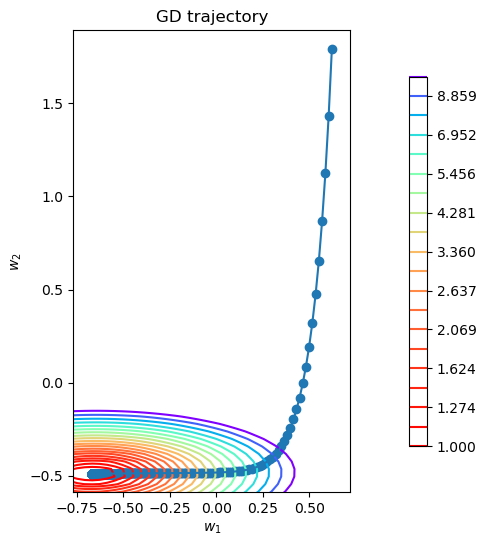

In [36]:
plot_gd(grad, X, y, loss)

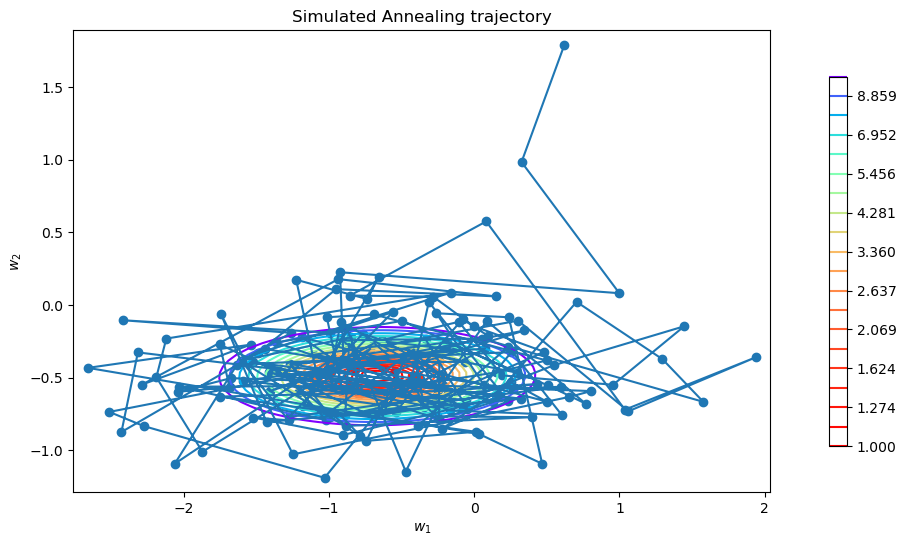

In [37]:
plot_ann(ann[0], X, y, loss)

полный ужас, нечего сказать

но вообще такой график и следовало ожидать: все же метод отжига сильно привязан к рандомным генерациям новых точек и вероятности их принятия, из-за чего график выглядит очень страшно, очень скачет и очень прыгает, а также требует большего количества итераций на больших датасетах